#**I. Giới thiệu**

Trong bài này, bọn em sẽ thực hiện những điều cơ bản đã học như là Web Scraping(Quét Web), Data Frames(Khung dữ liệu), Plotting(Vẽ đồ thị).
Bắt đầu, chúng em sẽ sử dụng Cơ sở dữ liệu trực tuyến của Pokemon, liên quan trực tiếp đến đề tài nhóm đã chọn
(https://pokemondb.net/pokedex/all).
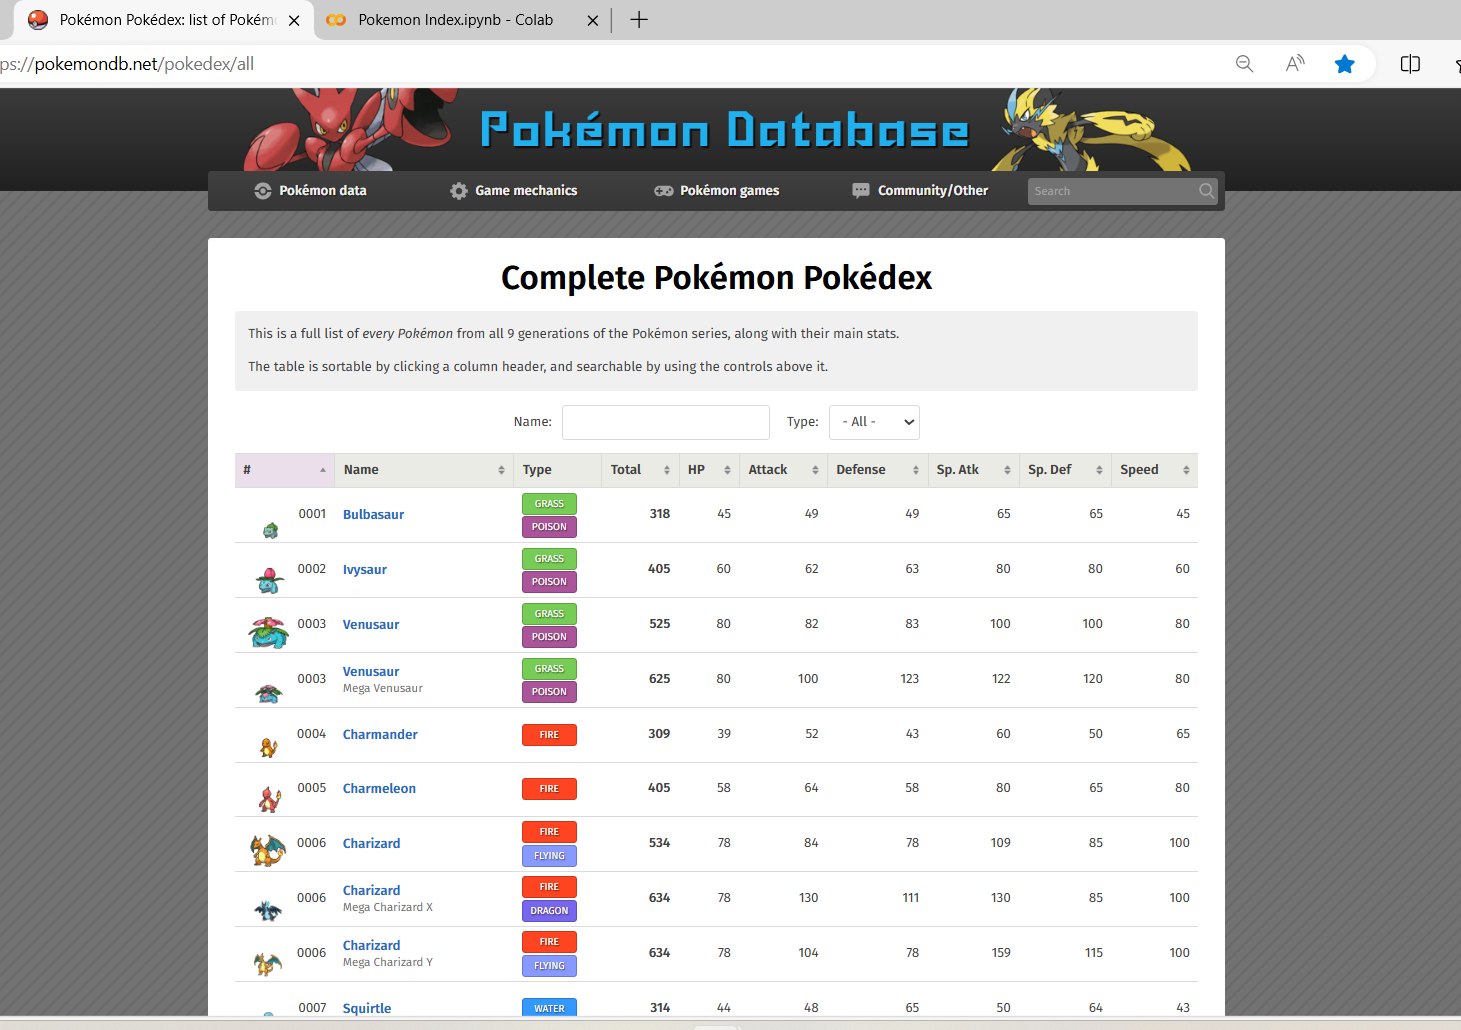

# **II. Phân tích dữ liệu**

Khai báo tất cả các thư viện cần thiết để chạy code

In [ ]:
#Khai báo thư viện
import requests, six
import lxml.html as lh
from itertools import cycle, islice
from matplotlib import colors
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

**Web Scraping**

Đầu tiên, khởi tạo url nhóm muốn scrape

In [ ]:
url='https://pokemondb.net/pokedex/all'

Bước tiếp theo, nhóm kiểm tra xem web này có cấu trúc như thế nào. Bằng cách click chuột phải vào phần tử ngẫu nhiên rồi chọn 'Inspect element'

Dựa trên mã HTML, dữ liệu được lưu trữ sau <tr...

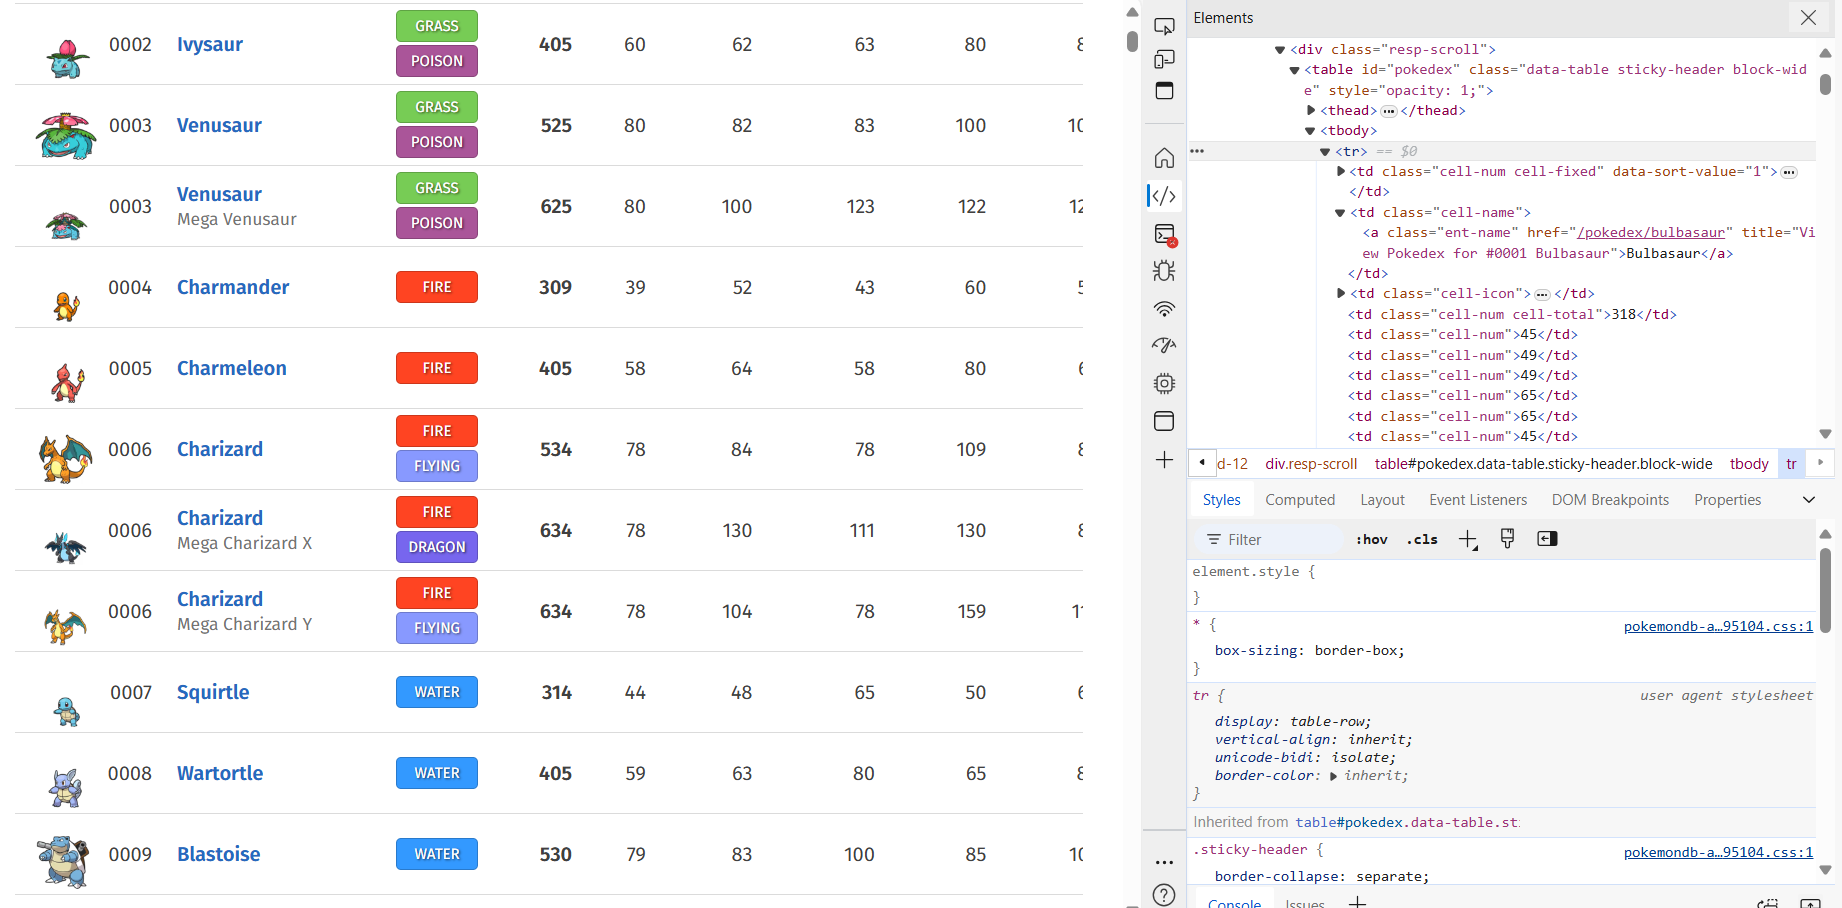

Đầu tiên, chúng ta sẽ lấy url bằng cách sử dụng thư viện requests của Python

Sau đó, chúng ta sẽ lưu trữ nội dung của trang dưới dạng chuỗi 'doc'.

Bằng cách sử dụng doc, chúng ta có thể thu thập tất cả dữ liệu dạng <tr... dưới dạng tr_elements.

Để đảm bảo rằng em chỉ thu thập thông tin từ bảng, em sẽ tiến hành kiểm tra kích thước của 12 hàng đầu tiên.

In [ ]:
#Tạo 1 handle, page, để xử lý nội dung của website
page = requests.get(url)

#Lưu trữ nội dung của web dưới doc
doc = lh.fromstring(page.content)

#Phân tích dữ liệu được lưu trữ giữa dạng <tr>..</tr> của trang web mã HTML
tr_elements = doc.xpath('//tr')

#Kiểm tra độ dài của 12 hàng đầu tiên
[len(T) for T in tr_elements[:12]]

[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]

Sau khi kiểm tra:
*   Tất cả các hàng có cùng độ dài là 10.
*   Điều này có nghĩa là tất cả dữ liệu được thu thập trên tr_elements đều từ bảng

In [ ]:
tr_elements = doc.xpath('//tr')

#Tạo danh sách trống
col=[]
i=0

#Đối với mỗi hàng, lưu trữ từng phần tử đầu tiên (tiêu đề) và 1 danh sách trống
for t in tr_elements[0]:
    i+=1
    name=t.text_content()
    print ('%d:"%s"'%(i,name))
    col.append((name,[]))

1:"#"
2:"Name"
3:"Type"
4:"Total"
5:"HP"
6:"Attack"
7:"Defense"
8:"Sp. Atk"
9:"Sp. Def"
10:"Speed"


Mỗi tiêu đề được thêm vào một bộ dữ liệu cùng với một danh sách trống.

Bây giờ, chúng ta sẽ điền vào các danh sách trống này các dữ liệu tương ứng

In [ ]:
#Vì hàng đầu tiên là tiêu đề nên dữ liệu được lưu trữ sẽ ở hàng thứ hai
for j in range(1, len(tr_elements)):
  #T is our j'th row
  T=tr_elements[j]

  #Nếu row không có kích thước là 10, dữ liệu //tr không có trong bảng
  if len(T)!=10:
    break

  #i is the index of our column
  i=0

  #Iterate through each element of the row
  for t in T.iterchildren():
      data=t.text_content()
      #Check if row is empty
      if i>0:
      #Convert any numerical value to integers
          try:
              data=int(data)
          except:
              pass
      #Append the data to the empty list of the i'th column
      col[i][1].append(data)
      #Increment i for the next column
      i+=1


Để chắc chắn, kiểm tra độ dài của mỗi cột. Lý tưởng nhất là tất cả chúng đều giống nhau.

In [ ]:
[len(C) for (title,C) in col]

[1215, 1215, 1215, 1215, 1215, 1215, 1215, 1215, 1215, 1215]

Sau khi kiểm tra và kết quả là chúng đều giống nhau. Bây giờ chúng ta có thể xây dựng Dataframe bằng Pandas.

In [ ]:
Dict={title:column for (title,column) in col}
import pandas as pd
df=pd.DataFrame(Dict)

In [ ]:
df['#'] = df['#'].str.replace('\n\n\n', '')
df.head(20)

,#,Name,Type,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,0001,Bulbasaur,Grass Poison,318,45,49,49,65,65,45
1,0002,Ivysaur,Grass Poison,405,60,62,63,80,80,60
2,0003,Venusaur,Grass Poison,525,80,82,83,100,100,80
3,0003,Venusaur Mega Venusaur,Grass Poison,625,80,100,123,122,120,80
4,0004,Charmander,Fire,309,39,52,43,60,50,65
5,0005,Charmeleon,Fire,405,58,64,58,80,65,80
6,0006,Charizard,Fire Flying,534,78,84,78,109,85,100
7,0006,Charizard Mega Charizard X,Fire Dragon,634,78,130,111,130,85,100
8,0006,Charizard Mega Charizard Y,Fire Flying,634,78,104,78,159,115,100
9,0007,Squirtle,Water,314,44,48,65,50,64,43


*   **Name:** Tên của pokemon
*   **Type:** Hệ của pokemon
*   **Total:** Tổng giá trị chỉ số của Pokemon
*   **Hp:** Chỉ số máu của pokemon
*   **Attack:** Chỉ số tấn công của pokemon
*   **Defense:** Chỉ số phòng thủ của pokemon
*   **Sp. Atk:** Chỉ số tấn công đặc biệt của pokemon khi sử dụng kĩ năng đặc biệt
*   **Sp. Def:** Chỉ số phòng thủ đặc biệt của pokemon chống đỡ lại kĩ năng đặc biệt của đối thủ
*   **Speed:** Chỉ số tốc độ

# **III. Biểu đồ biểu thị thông tin**

**1. Một số biểu đồ cột thể hiện tần suất của các chỉ số nổi bật và riêng biệt của tất cả pokemon**

Text(0, 0.5, 'Số lượng')

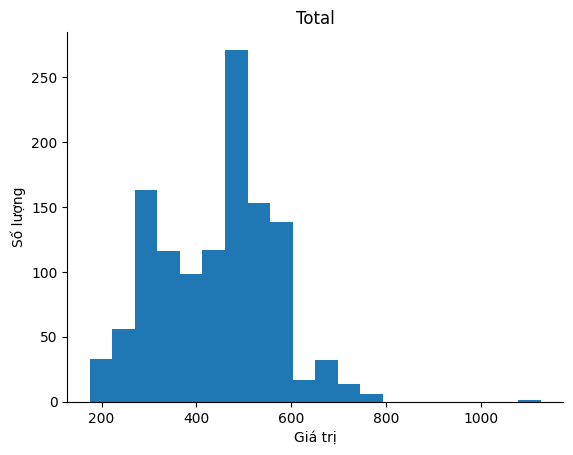

In [ ]:
# @title Biểu đồ cột chỉ số Total của tất cả Pokemon
df['Total'].plot(kind='hist', bins=20, title='Total')
plt.gca().spines[['top', 'right',]].set_visible(False)

plt.xlabel('Giá trị')
plt.ylabel('Số lượng')

*   Bảng này cho ta thấy số lượng pokemon có chỉ số total từ 400 đến 600 chiếm đa số
*   Giữa khoảng 800 - 1000 dường như ko có pokemon nào đạt mức này
*   Và lớn hơn 1000 chỉ có 1 pokemon đạt đến ngưỡng này.





Text(0, 0.5, 'Số lượng')

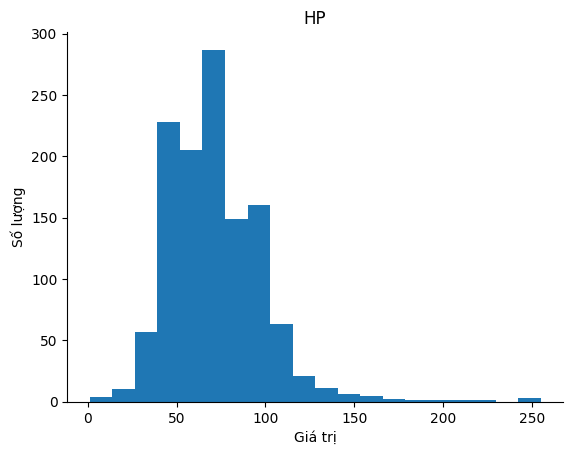

In [ ]:
# @title Biểu đồ cột chỉ số HP của tất cả Pokemon
df['HP'].plot(kind='hist', bins=20, title='HP')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.xlabel('Giá trị')
plt.ylabel('Số lượng')

*   Số lượng pokemon có chỉ số HP từ 50 đến 100 chiếm đa số
*   Lớn hơn 255 không có pokemon nào
*   Từ khoảng 150 đến ngưỡng 250 (và lớn hơn 1 chút) chỉ có khoảng 20 con pokemon đạt được đến mức độ chỉ số này

Text(0, 0.5, 'Số lượng')

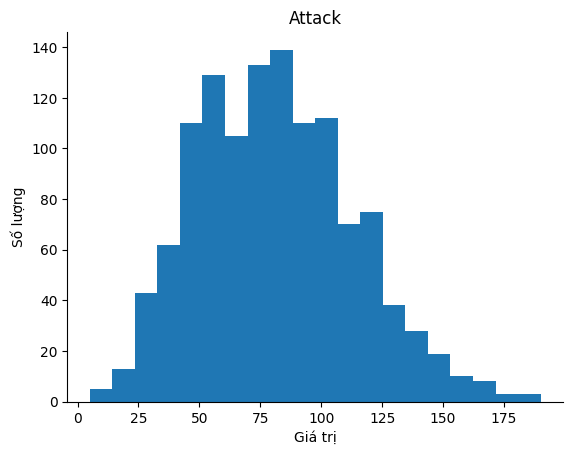

In [ ]:
# @title Biểu đồ cột chỉ số Attack của tất cả Pokemon
df['Attack'].plot(kind='hist', bins=20, title='Attack')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.xlabel('Giá trị')
plt.ylabel('Số lượng')

*   Số lượng pokemon có chỉ số Attack từ 50 đến 100 chiếm đa số
*   Pokemon có chỉ số attack lớn hơn 190 và nhỏ hơn 5 là không tồn tại
*   Pokemon có chỉ số attack nhỏ hơn 25 chiếm thiểu số
*   Bắt đầu từ 125 đổ đi ta thấy số lượng pokemon có atk mạnh bắt đầu giảm dần
*   Nhưng biểu đồ cho ta thấy số lượng pokemon có chỉ số atk khỏe không quá hiếm như 2 chỉ số ở trên là HP và Total
*   Không hiếm nhưng cũng không bị tràn lan quá, điều này tạo 1 môi trường Pokemon có sự phân chia rõ ràng hơn

Text(0, 0.5, 'Số lượng')

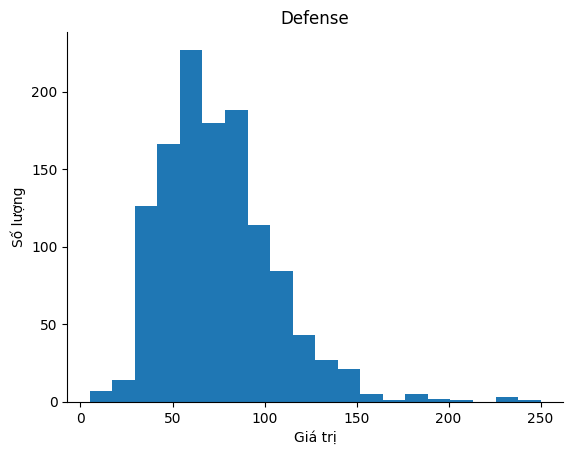

In [ ]:
# @title Biểu đồ cột chỉ số Defense của tất cả Pokemon
df['Defense'].plot(kind='hist', bins=20, title='Defense')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.xlabel('Giá trị')
plt.ylabel('Số lượng')

*   Số lượng pokemon có chỉ số Defense từ 50 đến 100 chiếm đa số
*   Từ khoảng chỉ số 100 đổ đi ta thấy số lượng đạt mức độ phòng thủ này bắt đầu giảm đi
*   từ khoảng 150 đến 250 thì số lượng rải rác và không còn phổ biến nữa
*   Và Defense điểm 250 là điểm cao nhất của 1 pokemon có thể có

Text(0, 0.5, 'Số lượng')

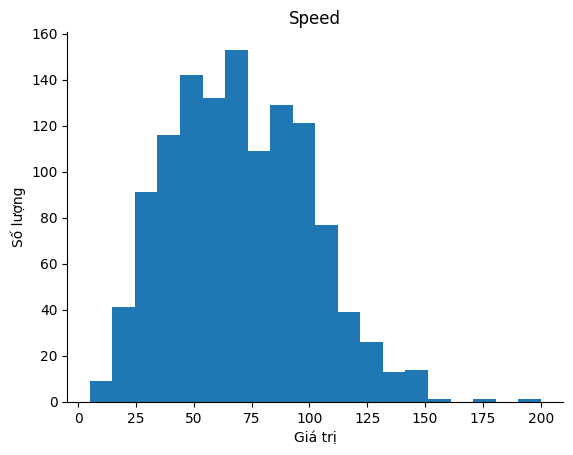

In [ ]:
# @title Biểu đồ cột chỉ số Speed của tất cả Pokemon
df['Speed'].plot(kind='hist', bins=20, title='Speed')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.xlabel('Giá trị')
plt.ylabel('Số lượng')

*   Chỉ số speed là 1 trong những yếu tố quan trọng của 1 ván đầu
*   Tuy pokemon của bạn có atk thấp hay chỉ số def thấp, cũng có thể tạo ra 1 số tình huống lật kèo đáng nhớ dành cho các pokemon thủ
*   Chỉ số spd nhỏ hơn 150 không hiếm
*   chiếm đa số,phổ biến và hay xuất hiện sẽ là từ khoảng 25 đến 100
*   Không quá 10 con pokemon có chỉ số spd lớn lớn 150

**2. Biểu đồ phân bổ chỉ số và thể hiện sự chênh lệch của pokemon**

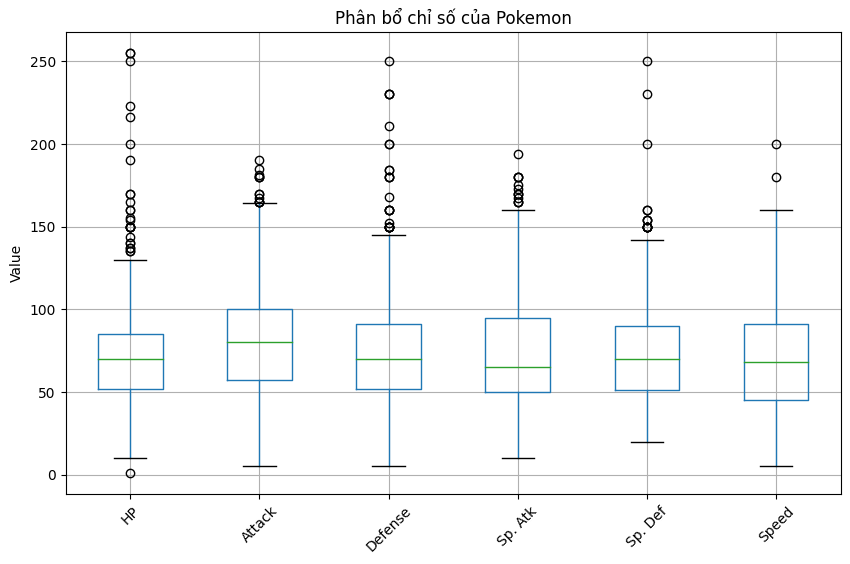

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

df.boxplot(column=['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed'])
plt.title('Phân bổ chỉ số của Pokemon')
plt.ylabel('Value')
_ = plt.xticks(rotation=45)

*   Sự chênh lệch trong nội bộ từng chỉ số:
  - Chỉ số HP: Chỉ số có sự biến động ít nhất, phản ánh chỉ số máu của tất cả pokemon là same nhau
  - Chỉ số Attack, Sp. Attack, Speed: Các chỉ số có sự biến động lớn nhất
  - Chỉ số Defense, Sp. Defense: 2 chỉ số này ít biến động nhưng vẫn có những phạm vi tương đối rộng

*   Các giá trị ngoại lệ
  - Chỉ số HP, Defense, Sp. Defense: Các chỉ số này có nhiều giá trị ngoại lệ cao, thường thì những pokemon hệ hiếm mới đạt được ngường này
  - Chỉ số Attack, Sp. Attack, Speed: Ít giá trị ngoại lệ hơn, giá trị chủ yếu tập trung trong một khoảng hẹp

**3. Pokemon mạnh nhất hoặc yếu nhất**

Bây giờ chúng ta sẽ in ra thông tin của những pokemon mạnh nhất hoặc yếu nhất trong từng chỉ số của chúng

In [ ]:
def max_stats(df, col_list):
    '''Lấy giá trị Pokemon cao nhất của cột trong Data Frame'''
    message = ''
    for col in col_list:
        stat = df[col].max()
        name = df[df[col]==df[col].max()]['Name'].values[0]
        message += name+' có chỉ số '+col+' mạnh nhất là '+str(stat)+'.\n'
    return message

def min_stats(df, col_list):
    '''Lấy giá trị Pokemon thấp nhất của cột trong Data Frame'''
    message = ''
    for col in col_list:
        stat = df[col].min()
        name = df[df[col]==df[col].min()]['Name'].values[0]
        message += name+' có chỉ số '+col+' yếu nhất là '+str(stat)+' .\n'
    return message

In [ ]:
stats=['Attack', 'Defense','HP', 'Sp. Atk','Sp. Def','Speed','Total']

print (max_stats(df, stats))

print (min_stats(df, stats))

Mewtwo Mega Mewtwo X có chỉ số Attack mạnh nhất là 190.
Eternatus Eternamax có chỉ số Defense mạnh nhất là 250.
Blissey có chỉ số HP mạnh nhất là 255.
Mewtwo Mega Mewtwo Y có chỉ số Sp. Atk mạnh nhất là 194.
Eternatus Eternamax có chỉ số Sp. Def mạnh nhất là 250.
Regieleki có chỉ số Speed mạnh nhất là 200.
Eternatus Eternamax có chỉ số Total mạnh nhất là 1125.

Chansey có chỉ số Attack yếu nhất là 5 .
Chansey có chỉ số Defense yếu nhất là 5 .
Shedinja có chỉ số HP yếu nhất là 1 .
Sandshrew Alolan Sandshrew có chỉ số Sp. Atk yếu nhất là 10 .
Caterpie có chỉ số Sp. Def yếu nhất là 20 .
Shuckle có chỉ số Speed yếu nhất là 5 .
Wishiwashi Solo Form có chỉ số Total yếu nhất là 175 .



*   Eternatus Eternamax là pokemon có chỉ số 'Total' mạnh nhất là 1125. Có nghĩa là cộng lại tất cả chỉ số thì pokemon này là khỏe nhất
*   Nếu như là 1 fan Pokemon hoặc có tuổi thơ với màn hình to thời 9x 2x thế hệ đầu có thể thấy mewtwo vẫn dẫn đầu với chỉ số tấn công khỏe nhất, con pokemon này cũng được nhận định là 1 trong những sinh vật mạnh nhất nhì thế giới pokemon

Tiếp theo, hãy xem liệu có mối liên kết nào giữa bất kỳ số liệu trong số này không.

array([[<Axes: xlabel='Attack', ylabel='Attack'>,
        <Axes: xlabel='Defense', ylabel='Attack'>,
        <Axes: xlabel='HP', ylabel='Attack'>,
        <Axes: xlabel='Sp. Atk', ylabel='Attack'>,
        <Axes: xlabel='Sp. Def', ylabel='Attack'>,
        <Axes: xlabel='Speed', ylabel='Attack'>,
        <Axes: xlabel='Total', ylabel='Attack'>],
       [<Axes: xlabel='Attack', ylabel='Defense'>,
        <Axes: xlabel='Defense', ylabel='Defense'>,
        <Axes: xlabel='HP', ylabel='Defense'>,
        <Axes: xlabel='Sp. Atk', ylabel='Defense'>,
        <Axes: xlabel='Sp. Def', ylabel='Defense'>,
        <Axes: xlabel='Speed', ylabel='Defense'>,
        <Axes: xlabel='Total', ylabel='Defense'>],
       [<Axes: xlabel='Attack', ylabel='HP'>,
        <Axes: xlabel='Defense', ylabel='HP'>,
        <Axes: xlabel='HP', ylabel='HP'>,
        <Axes: xlabel='Sp. Atk', ylabel='HP'>,
        <Axes: xlabel='Sp. Def', ylabel='HP'>,
        <Axes: xlabel='Speed', ylabel='HP'>,
        <Axes: xlabel='

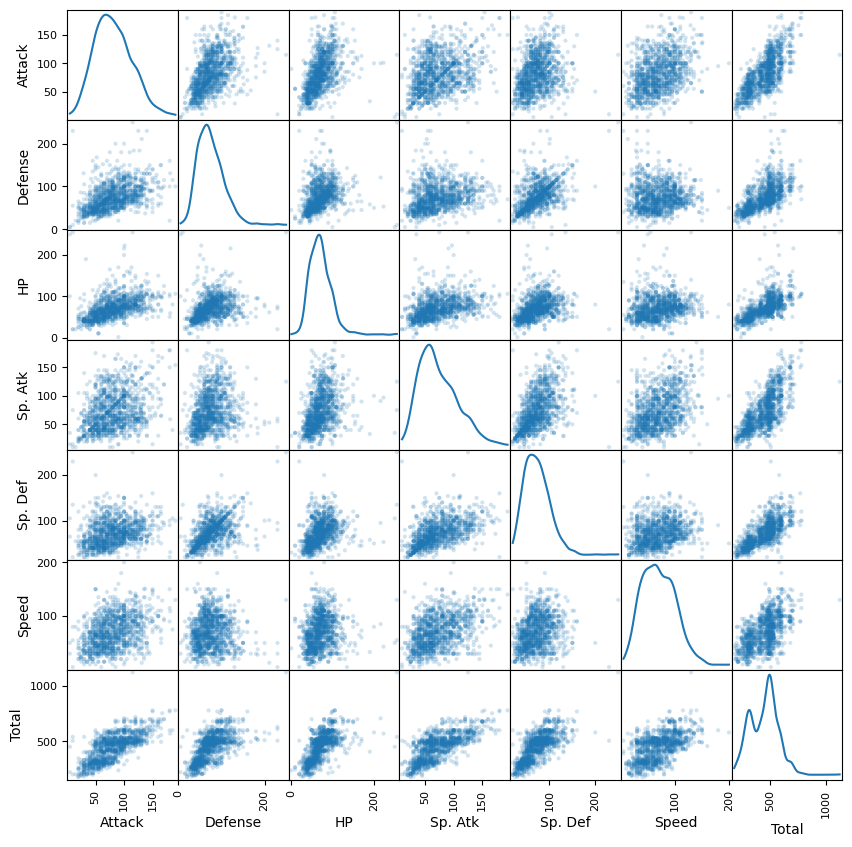

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(df[stats], alpha=0.2, figsize=(10, 10), diagonal='kde')

Có quá nhiều thông tin tại điểm này. Ta có thể thấy, chỉ số Total có tương quan thuận với mọi thứ và do đó bọn em sẽ xóa nó khỏi biểu đồ này.

array([[<Axes: xlabel='Attack', ylabel='Attack'>,
        <Axes: xlabel='Defense', ylabel='Attack'>,
        <Axes: xlabel='HP', ylabel='Attack'>,
        <Axes: xlabel='Sp. Atk', ylabel='Attack'>,
        <Axes: xlabel='Sp. Def', ylabel='Attack'>,
        <Axes: xlabel='Speed', ylabel='Attack'>],
       [<Axes: xlabel='Attack', ylabel='Defense'>,
        <Axes: xlabel='Defense', ylabel='Defense'>,
        <Axes: xlabel='HP', ylabel='Defense'>,
        <Axes: xlabel='Sp. Atk', ylabel='Defense'>,
        <Axes: xlabel='Sp. Def', ylabel='Defense'>,
        <Axes: xlabel='Speed', ylabel='Defense'>],
       [<Axes: xlabel='Attack', ylabel='HP'>,
        <Axes: xlabel='Defense', ylabel='HP'>,
        <Axes: xlabel='HP', ylabel='HP'>,
        <Axes: xlabel='Sp. Atk', ylabel='HP'>,
        <Axes: xlabel='Sp. Def', ylabel='HP'>,
        <Axes: xlabel='Speed', ylabel='HP'>],
       [<Axes: xlabel='Attack', ylabel='Sp. Atk'>,
        <Axes: xlabel='Defense', ylabel='Sp. Atk'>,
        <Axes: xla

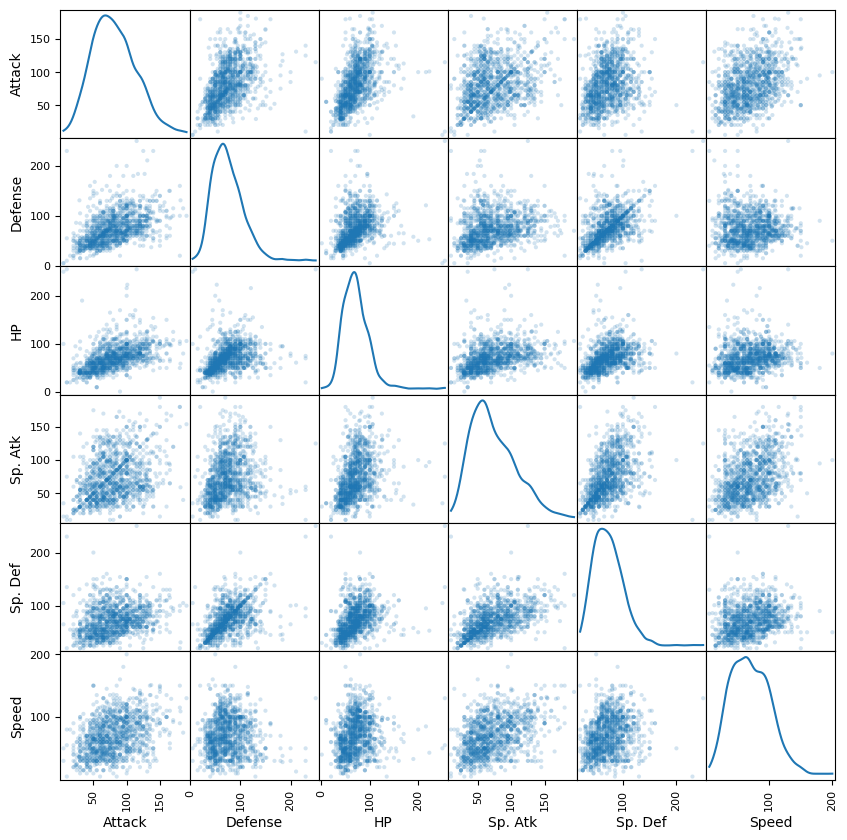

In [ ]:
# @title Biểu đồ thể hiện sự tương quan của của các chỉ số
scatter_matrix(df[stats[:-1]], alpha=0.2, figsize=(10,10), diagonal='kde')



*   Ta có thể thấy Defense và Special Defense là 1 mối quan hệ tương quan đồng biến, cả 2 đều phát triển theo cùng 1 hướng
*   Các số liệu thống kê khác cũng có một số mối liên kết nhưng giá trị R^2 quá thấp.


**4. Các hệ của Pokemon**

Hiện tại ở cột Type, có những pokemon có nhiều hơn 1 hệ, nên chúng ta cần thực hiện tách riêng các hệ đó ra thành 2 row khác nhau để có thể dễ dàng thống kê chi tiết các hệ riêng biệt có bao nhiêu pokemon

In [ ]:
#Đầu tiên, em sẽ tạo 1 dataframe mới để lưu trữ thông tin sau khi tách type thành riêng biệt
newDict={}
stats_col=["#","Name","Total","HP","Attack","Defense","Sp. Atk","Sp. Def"]

#Thu thập danh sách của cột 'Type' cho từng Pokemon
Dict['Type']=df['Type'].values

#Tạo danh sách trống cho mỗi khóa (cột)
for col in stats_col:
    newDict[col]=[]
    newDict['Type']=[]

#
for row in range(len(Dict['#'])):
    for t in Dict['Type'][row].split():
        for col in stats_col:
            #Nối tất cả các cột ngoại trừ cột 'Type' vào newDict
            newDict[col].append(Dict[col][row])

        #Fill cột Type sau khi được tách riêng biệt cho từng Pokemon vào trong newDict
        newDict['Type'].append(t)


#Chuyển đổi dictionary thành 1 Data Frame
new_df = pd.DataFrame(newDict)

In [ ]:
types=new_df['Type'].unique()
print(types)

['Grass' 'Poison' 'Fire' 'Flying' 'Dragon' 'Water' 'Bug' 'Normal' 'Dark'
 'Electric' 'Psychic' 'Ground' 'Ice' 'Steel' 'Fairy' 'Fighting' 'Rock'
 'Ghost']


In [ ]:
new_df['#'] = new_df['#'].str.replace('\n\n\n', '')
new_df.head()

,#,Type,Name,Total,HP,Attack,Defense,Sp. Atk,Sp. Def
0,0001,Grass,Bulbasaur,318,45,49,49,65,65
1,0001,Poison,Bulbasaur,318,45,49,49,65,65
2,0002,Grass,Ivysaur,405,60,62,63,80,80
3,0002,Poison,Ivysaur,405,60,62,63,80,80
4,0003,Grass,Venusaur,525,80,82,83,100,100


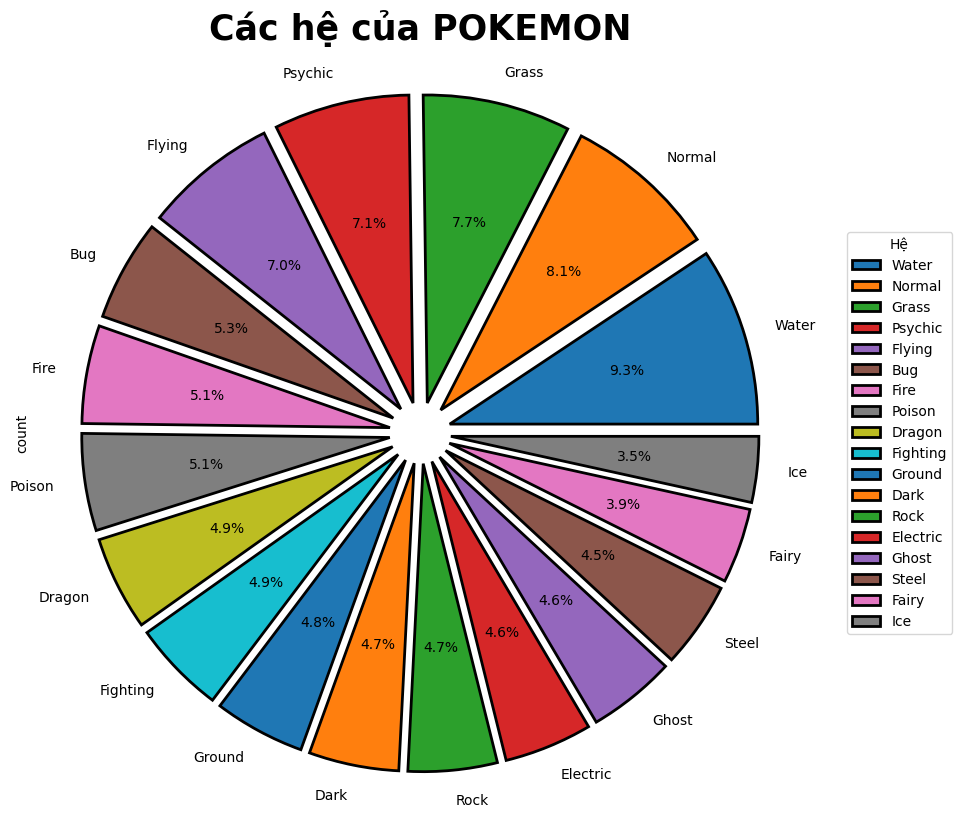

In [ ]:
# @title Biểu đồ thể hiện các hệ của POKEMON
fig = plt.figure(figsize=(10,10))
wp = {'linewidth':2, 'edgecolor':"black"}
types = new_df['Type'].value_counts()
explode = (0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1)
types.plot(kind='pie', autopct="%0.1f%%",explode = explode, wedgeprops = wp)
plt.legend(title="Hệ", loc='center right', bbox_to_anchor=(1.2, 0.5))
plt.title("Các hệ của POKEMON", loc='center', color='Black',fontsize='25',fontweight='bold')
plt.show()

*   Ta có thể nhận thấy, có 1215 pokemon khác nhau với 18 tộc hệ riêng biệt
*   Số lượng Pokemon hệ nước(water) chiếm nhiều nhất là 9.3%
*   Số lượng Pokemon hệ băng(ice) chiếm thiểu số chỉ vỏn vẹn 3.5% trên tổng số
*   Psychic và Flying có thể coi là gần bằng nhau khi chỉ cách nhau 0.1%
*   Bug, Fire, Poison là 3 hệ có đầu là 5
*   Dragon, Fighting, Ground, Dark, Rock, Electric, Ghost, Steel là các hệ phổ biến vì có đầu 4 là nhiều, có vẻ những hệ này không quá khó và cũng không quá dễ để sở hữu, bạn sẽ có 4.5% pokemon để sở hữu hệ steel và 4.9% đối với pokemon hệ rồng(dragon)






# **IV. POKEDEX**

Chức năng dưới đây giúp em tra cứu được thông tin của pokemon em muốn tìm hiểu

Google Colab không hỗ trợ trực tiếp việc tạo GUI truyền thống như có thể làm với Tkinter trong Python. Thế nên em sử dụng các thư viện như "ipywidgets" và "IPython.display" để tạo các giao diện tương tác cơ bản trong môi trường Jupyter Notebook, bao gồm cả Google Colab.

In [ ]:
import ipywidgets as widgets
from IPython.display import display, clear_output
from IPython.display import Image, display
import pandas as pd
import time
import requests  # Import requests for custom headers
# from IPython.display import display, HTML

# display(HTML('<h1><b>POKEDEX</b></h1>'))

def get_pokemon_data(name):
    # Lấy nội dung của trang web và chuyển đổi thành DataFrame
    url = 'https://pokemondb.net/pokedex/all'

    # Add a delay and custom headers to avoid issues
    time.sleep(2)  # Increase the delay
    headers = {'User-Agent': 'Mozilla/5.0'}  # Add a User-Agent header

    # Use requests to fetch the page with headers
    response = requests.get(url, headers=headers)
    tables = pd.read_html(response.text)  # Read from response text

    # Bảng đầu tiên chứa dữ liệu Pokémon
    df = tables[0]

    # Tìm kiếm Pokémon theo tên
    pokemon_data = df[df['#'].notna() & (df['Name'].str.lower() == name.lower())]

    if not pokemon_data.empty:
        return pokemon_data.iloc[0]
    else:
        return None

# Nhập tên Pokémon
pokemon_name = input("Nhập tên Pokémon: ")

# Lấy dữ liệu của Pokémon
data = get_pokemon_data(pokemon_name)

#image url
def get_img_url(name):
    image_url = 'https://img.pokemondb.net/artwork/' + pokemon_name  + '.jpg'
    return image_url

# In dữ liệu của Pokémon
if data is not None:
    image_url = get_img_url(pokemon_name)
    result = display(Image(url=image_url))
    print('Thông tin Pokemon:')
    print(f'Tên: {data["Name"]}')
    print(f'Số: {data["#"]}')
    print(f'Type: {data["Type"]}')
    print(f'Total: {data["Total"]}')
    print(f'HP: {data["HP"]}')
    print(f'Attack: {data["Attack"]}')
    print(f'Defense: {data["Defense"]}')
    print(f'Sp. Atk: {data["Sp. Atk"]}')
    print(f'Sp. Def: {data["Sp. Def"]}')
    print(f'Speed: {data["Speed"]}')
else:
    print('Không tìm thấy Pokémon có tên đó.')

Nhập tên Pokémon: ditto


Thông tin Pokemon:
Tên: Ditto
Số: 132
Type: Normal
Total: 288
HP: 48
Attack: 48
Defense: 48
Sp. Atk: 48
Sp. Def: 48
Speed: 48


---

# **V. Sử dụng nguồn tài liệu mở**

Với tài liệu này, ta có thể biết được :
*   Loại Pokemon tốt nhất em có thể sử dụng để chiến đấu với Pokemon của đối thủ là gì?

In [ ]:
#Load data
data = pd.read_csv('/content/sample_data/pokemon.csv')

data

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,['Beast Boost'],0.25,1.0,0.5,2.0,0.5,1.0,2.0,0.5,1.0,...,NaN,797,107,101,61,steel,flying,999.9,7,1
797,['Beast Boost'],1.00,1.0,0.5,0.5,0.5,2.0,4.0,1.0,1.0,...,NaN,798,59,31,109,grass,steel,0.1,7,1
798,['Beast Boost'],2.00,0.5,2.0,0.5,4.0,2.0,0.5,1.0,0.5,...,NaN,799,97,53,43,dark,dragon,888.0,7,1
799,['Prism Armor'],2.00,2.0,1.0,1.0,1.0,0.5,1.0,1.0,2.0,...,NaN,800,127,89,79,psychic,NaN,230.0,7,1


In [ ]:
data.columns

Index(['abilities', 'against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison', 'against_psychic',
       'against_rock', 'against_steel', 'against_water', 'attack',
       'base_egg_steps', 'base_happiness', 'base_total', 'capture_rate',
       'classfication', 'defense', 'experience_growth', 'height_m', 'hp',
       'japanese_name', 'name', 'percentage_male', 'pokedex_number',
       'sp_attack', 'sp_defense', 'speed', 'type1', 'type2', 'weight_kg',
       'generation', 'is_legendary'],
      dtype='object')

*   Vậy là ở trong tệp dữ liệu mở này , chúng ta có cả biến định tính (type 1, type 2, name, abilities) và biến định lượng (HP, base_total, attack, defense, speed, weight…)
*   Ở đây có quá nhiều biến và nhiều biến thực sự ta không cần dùng đến, thế nên tiếp theo ta chỉ quan tâm đến những biến nào có thể giúp ích tìm ra pokemon tốt nhất để đấu với đổi thủ



**1. Loại pokemon tốt nhất tôi có thể sử dụng để đấu với đối thủ là gì?**

In [ ]:
#Có bao nhiêu hệ ở đây
len(set(data.type1))

18

In [ ]:
types_columns = ['type1', 'against_bug', 'against_dark', 'against_dragon', 'against_electric',
                    'against_fairy', 'against_fight', 'against_fire', 'against_flying',
                    'against_ghost', 'against_grass', 'against_ground', 'against_ice',
                    'against_normal', 'against_poison', 'against_psychic', 'against_rock',
                    'against_steel', 'against_water']
len(types_columns)

19

In [ ]:
#Chúng ta tạo 1 dataframe mới (types_df) chỉ áp dụng với 'type1' và 'against_x'
types_df = data[types_columns]
types_df.shape

(801, 19)

In [ ]:
types_df.head()

,type1,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water
0,grass,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5
1,grass,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5
2,grass,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5
3,fire,0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0
4,fire,0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0


In [ ]:
#Nhóm khung dữ liệu theo 'type1' và điểm trung bình của từng loại so với against_x
grouped_df = types_df.groupby('type1').mean()

In [ ]:
print(grouped_df.shape)
grouped_df.head()

(18, 18)


,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water
type1,,,,,,,,,,,,,,,,,,
bug,0.826389,0.979167,0.937500,1.138889,0.916667,0.458333,2.194444,2.083333,1.013889,0.420139,0.562500,1.208333,0.930556,0.930556,1.159722,2.291667,0.972222,1.020833
dark,1.724138,0.534483,1.103448,1.103448,2.275862,1.965517,1.034483,1.034483,0.551724,0.775862,0.965517,1.206897,0.931034,0.913793,0.000000,1.241379,1.000000,1.000000
dragon,0.944444,1.037037,2.000000,0.490741,2.111111,0.925926,0.509259,1.055556,1.074074,0.527778,0.925926,2.518519,1.000000,0.925926,1.037037,1.111111,1.000000,0.592593
electric,0.871795,1.000000,0.897436,0.538462,0.948718,1.064103,1.102564,0.474359,0.974359,0.910256,2.051282,1.025641,0.923077,0.935897,0.948718,1.025641,0.500000,1.000000
fairy,0.472222,0.500000,0.000000,1.111111,1.000000,0.472222,1.000000,1.000000,1.000000,0.944444,0.888889,1.111111,1.000000,2.000000,1.000000,1.111111,2.000000,1.000000


Grouped_df cho chúng ta biết giá trị trung bình của types trên against_x. Điều này giúp chúng ta bắt đầu hướng tới sự hình dung đối với nội dung của mình chuẩn bị làm sắp tới.

In [ ]:
#Chúng ta có thể tìm ra đối thủ tốt nhất bằng cách lấy max cột của đối thủ
against_bug_val = grouped_df['against_bug']

In [ ]:
against_bug_val.max()

1.7241379310344827

In [ ]:
#Nhận dạng 'loại' của đối thủ và dự đoán 'loại' mạnh nhất để đấu
def predict_strongest_types(input_type):

    against_column = 'against_' + input_type
    against_values = grouped_df[against_column]
    strongest_type = against_values.idxmax()

    return strongest_type

In [ ]:
input_type = 'bug'

In [ ]:
predicted_types = predict_strongest_types(input_type)
print(predicted_types)

dark


Ở đây chúng ta chọn hệ đối thủ là "bug" và tìm ra hệ tốt nhất đấu lại nó

In [ ]:
predicted_df = pd.DataFrame(columns=['type_opponent', 'type_predicted_best'])

In [ ]:
for column in grouped_df.columns:
    if column.startswith('against_'):
        opponent_type = column.replace('against_', '')
        predicted_best_type = predict_strongest_types(opponent_type)

        # Tạo một DataFrame cho hàng mới
        new_row = pd.DataFrame({'type_opponent': [opponent_type], 'type_predicted_best': [predicted_best_type]})

        # Sử dụng pd.concat để thêm hàng mới vào DataFrame
        predicted_df = pd.concat([predicted_df, new_row], ignore_index=True)

In [ ]:
print(predicted_df)

   type_opponent type_predicted_best
0            bug                dark
1           dark             psychic
2         dragon              dragon
3       electric               water
4          fairy                dark
5          fight                rock
6           fire                 bug
7         flying                 bug
8          ghost             psychic
9          grass                rock
10        ground               steel
11           ice              flying
12        normal              dragon
13        poison               fairy
14       psychic              poison
15          rock                 bug
16         steel               fairy
17         water              ground


In [ ]:
pip install plotly

In [ ]:
!pip install pySankey

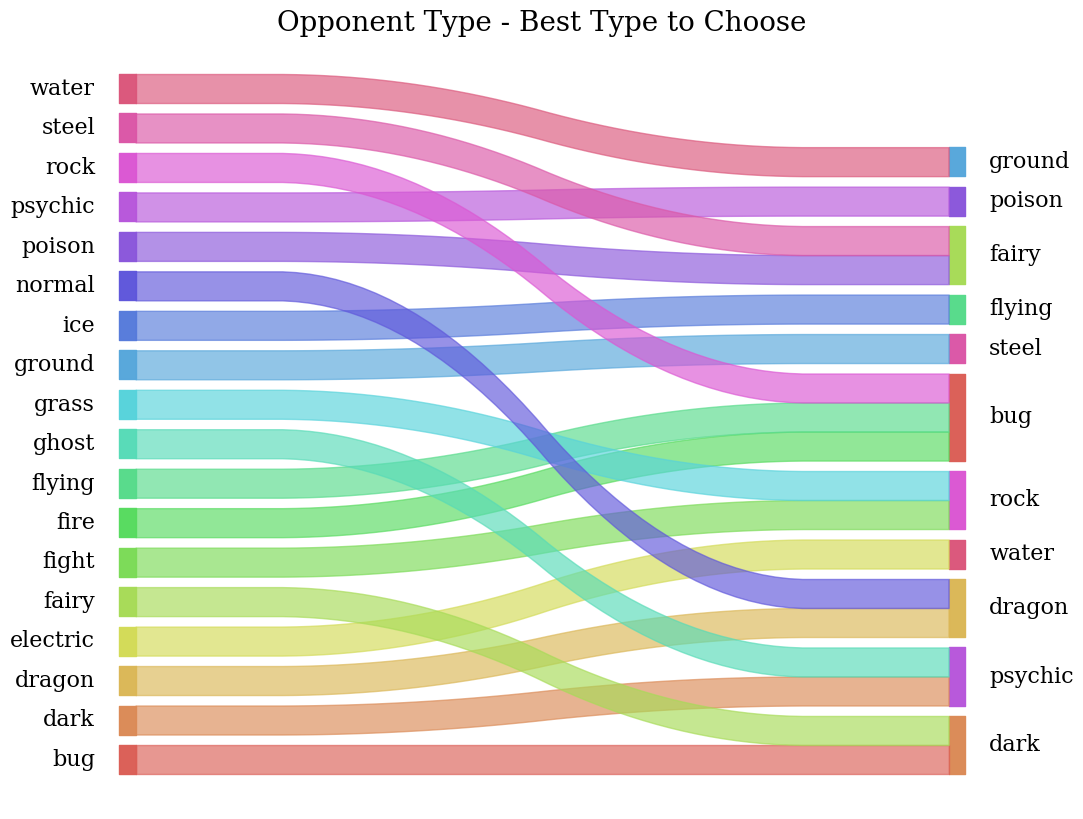

In [ ]:
from pySankey.sankey import sankey
sankey(predicted_df['type_opponent'], predicted_df['type_predicted_best'], fontsize=16)
plt.title('Opponent Type - Best Type to Choose', fontsize=20)
plt.gcf().set_size_inches((12, 10))
plt.show()

*   Ta có thể dễ dàng nhận thấy, pokemon hệ "bug" là hữu dụng nhất khi có thể đem ra sử dụng vì nó có thể đấu tốt nhất với 3 hệ là flying, fire, rock.
*   Bên trái là hệ của pokemon đối thủ, và bên phải là pokemon hệ tốt nhất để đem ra đấu với chúng
*   Có 4 hệ pokemon có thể đem ra để đấu tốt nhất với 2 hệ khác
*   Và dường như cũng có 5 hệ đơn lẻ khác sinh ra để triệt hạ pokemon hệ đơn lẻ của đối thủ



**2. Sự phân phối Pokemon của tác giả để làm cho thế giới thêm sinh động**

<ipython-input-26-681ba4d70d62>:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('Spectral', 8)
<ipython-input-26-681ba4d70d62>:35: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(principal_components[i, 0], principal_components[i, 1], principal_components[i, 2],
<ipython-input-26-681ba4d70d62>:60: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provid

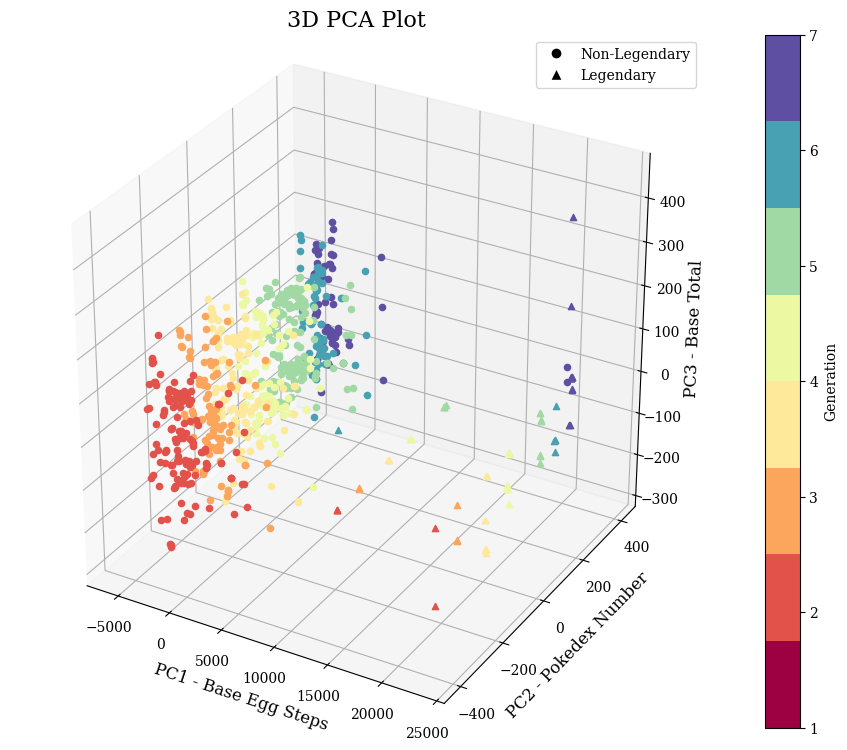

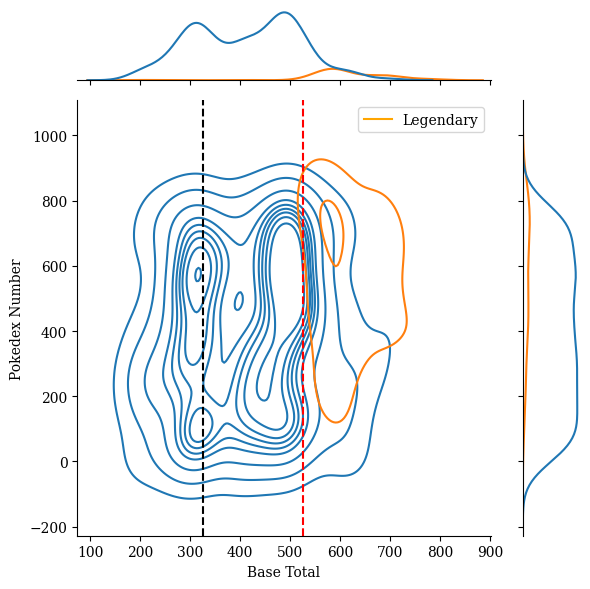

In [ ]:
import seaborn as sns

from matplotlib.lines import Line2D
from matplotlib.cm import ScalarMappable

from sklearn.decomposition import PCA

data = pd.read_csv('/content/sample_data/pokemon.csv')

#Chọn các đặc điểm mà chúng tôi đã xác định bằng cách thu hẹp các biến độc lập
features = ['base_total', 'pokedex_number', 'base_egg_steps']

#Run PCA
pca = PCA(n_components=3)
pca.fit(data[features])

#Lấy các thành phần chính
principal_components = pca.transform(data[features])

#Xác định bản đồ màu bằng một màu duy nhất cho mỗi thế hệ
colormap = plt.cm.get_cmap('Spectral', 8)

#Xác định điểm đánh dấu cho từng điểm dữ liệu dựa trên cột 'is_legendary'
markers = ['o' if value == 0 else '^' for value in data['is_legendary']]

plt.figure(figsize=(16, 9))
ax = plt.axes(projection='3d')

#Đặt cho pokemon Legendary thành điểm đánh dấu hình tam giác
for i, marker in enumerate(markers):
    ax.scatter(principal_components[i, 0], principal_components[i, 1], principal_components[i, 2],
               c=colormap(data['generation'][i]), marker=marker, s=20)

# nhãn và tiêu đề
ax.set_xlabel('PC1 - Base Egg Steps', fontsize=12)
ax.set_ylabel('PC2 - Pokedex Number', fontsize=12)
ax.set_zlabel('PC3 - Base Total', fontsize=12)
ax.set_title('3D PCA Plot', fontsize=16)

#chú thích
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Non-Legendary', markerfacecolor='black', markersize=8),
    Line2D([0], [0], marker='^', color='w', label='Legendary', markerfacecolor='black', markersize=8)
]
ax.legend(handles=legend_elements)

ax.set_box_aspect([1, 1, 1])
ax.tick_params(labelsize=10)

#màu, biến độc lập, biến rời
sm = ScalarMappable(cmap=colormap)
sm.set_array(data['generation'])
cbar = plt.colorbar(sm)
cbar.set_ticks(range(1, 8))
cbar.set_label('Generation')

#Chia dữ liệu thành hai phần dựa trên giá trị trung bình
below_mean = data[data['base_total'] < data['base_total'].mean()]
above_mean = data[data['base_total'] >= data['base_total'].mean()]

#Tạo một sơ đồ chung cho các biến 'base_total' và 'generation'
g = sns.jointplot(data=data, x='base_total', y='pokedex_number', kind='kde', hue='is_legendary')

#Thêm một dòng để hiển thị giá trị trung bình của mỗi phân phối (các nhóm dưới trung bình và trên trung bình)
g.ax_joint.axvline(below_mean['base_total'].mean(), color='black', linestyle='--', label='Below Average')
g.ax_joint.axvline(above_mean['base_total'].mean(), color='red', linestyle='--', label='Above Average')

#chú thích cho biểu đồ th2
g.ax_joint.legend(['Below Average', 'Above Average'])

#"legend" = cam
legend_elements2 = [
    Line2D([0], [0], color='orange', label='Legendary')
]
g.ax_joint.legend(handles=legend_elements2, loc='upper right')

g.ax_joint.add_artist(legend_elements[0])
g.ax_joint.add_artist(legend_elements[1])

g.set_axis_labels('Base Total', 'Pokedex Number')

plt.tight_layout()

plt.show()

*   Rõ ràng là có sự phân bổ hai chiều trong Base Total.
*   Pokemon huyền thoại được xác định bởi số lượng Base Egg Steps và Base Total.
*   Hơn nữa, màu sắc của thế hệ cho thấy pokemon huyền thoại KHÔNG tập trung ở bất kỳ thế hệ cụ thể nào mà lan rộng khắp Pokedex.
*   PCA và KDE cho thấy rõ ràng rằng Pokemon huyền thoại nằm trong một vùng của riêng chúng. Tất cả chúng không chỉ tập trung vào phần trên trung bình của KDE, mà còn chủ yếu bao gồm phần lớn Pokemon có 20.000 bước trở lên và có base total cao. Thang đo Pokedex cho thấy có sự phân bố Pokemon Huyền thoại tương đối giống nhau trên mỗi thế hệ, phân bố đều trên các số Pokedex.
*   Có khoảng 50-50 cơ hội nhận được pokemon trên trung bình hoặc dưới trung bình, được ước tính bởi một khu vực tương tự dưới đường cong KDE.
*   Với base total trên mức trung bình, những Pokemon huyền thoại này rất mạnh và có thể đánh bại hầu hết các đối thủ chỉ dựa vào chỉ số.
*   Khi xem Type và Type Sankey của chúng tôi, chúng ta có thể biết loại Pokemon nào có khả năng đánh bại loại đối thủ mạnh nhất. Do đó, tất cả các chỉ số khác đều như nhau, một số đòn tấn công có thể hiệu quả hơn những đòn tấn công khác tùy thuộc vào loại Pokemon. Dữ liệu bổ sung này có thể giúp người dùng đưa ra quyết định sáng suốt về việc nên chọn Pokemon nào trong danh sách của họ.